In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

C:\programs\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Parameters of the problem
sol = np.array([[1],[2]]) # Model to find back: y = s0 + s1 * x, this is the expected solution
noiselevel = 5            # standard deviation of the noise applied to the observed values
N = 100                   # Number of samples
seedinit = 0              # Initialization value for random generation

<tf.Tensor 'MatMul_11:0' shape=(2, 1) dtype=float32>

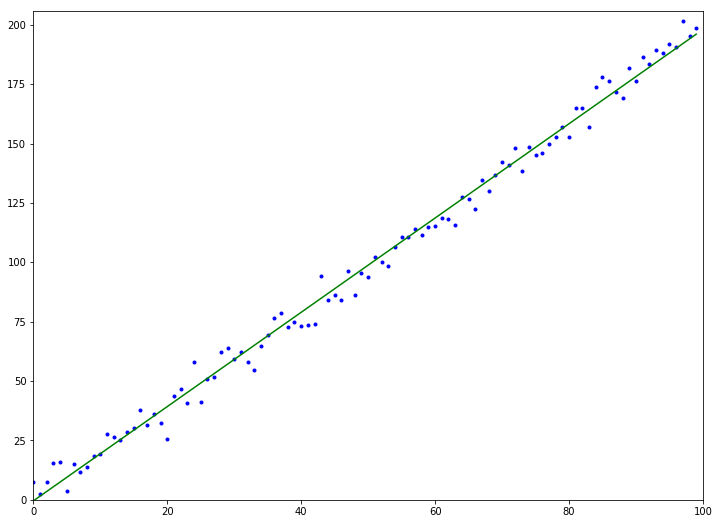

In [7]:
x = tf.placeholder(tf.float32, shape=(N,1)) # Placeholder for the inputs
y = tf.placeholder(tf.float32, shape=(N,1)) # Placeholder for the observed values
xin = np.arange(0,N,1,dtype=float).reshape(N, 1) # Generating the input values
Ain = np.concatenate((np.ones((N,1),dtype=float), xin), axis=1) # Building the matrix: A x = y for the expected values
np.random.seed(seedinit) # Initializing the generator the control the reproducibility of the test
yin = np.matmul(Ain, sol) + noiselevel * (np.random.randn(N,1) - 0.5) # Generating observed values
A = tf.concat((tf.ones((N,1),dtype=tf.float32),x), 1) # Tensorflow model: A x = y
s = tf.matmul(tf.linalg.inv(tf.matmul(tf.transpose(A),A)), tf.matmul(tf.transpose(A), y))
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    sout = sess.run(s, feed_dict = {x:xin, y:yin})
    
plt.figure(figsize=(12,9))
plt.axis([0, N, 0, (sol[0][0] + sol[1][0]*N + noiselevel)])
plt.plot(xin,yin, 'b.')        # Displaying the samples used for fitting
ys = np.matmul(Ain, sout)
plt.plot(xin, ys, 'g')

s